In [1]:
import pandas as pd
from utils import make_plot, rmse

In [2]:
log_file_path = 'wardi_helix_spin_mihir_yaw.log' #wardi_hover_cpp0.log'
# Reading the .log file into a pandas DataFrame
df_log = pd.read_csv(log_file_path, header=0, dtype={'metadata': str})

# Display the first few rows to confirm successful import
df_log.head()

,time,x,y,z,yaw,throttle,roll_rate,pitch_rate,yaw_rate,x_ref,y_ref,z_ref,yaw_ref,pred_time,nr_time,metadata
0,7.152557e-07,0.034821,-0.011821,0.006366,-0.004321,-0.726677,0.133407,-0.276939,0.127284,0.555705,0.226257,-0.813129,0.335104,0.181783,0.182122,Sim
1,1.828198e-01,0.034821,-0.011821,0.006366,-0.004321,-0.745069,0.230743,-0.433857,0.245100,0.533571,0.274413,-0.837206,0.411683,0.000385,0.000586,Jax
2,1.900704e-01,0.032404,-0.010923,0.006913,-0.004177,-0.759757,0.285354,-0.543700,0.328656,0.532606,0.276281,-0.838141,0.414720,0.000319,0.000537,0OrderHold
3,2.002711e-01,0.032054,-0.010862,0.006804,-0.004179,-0.771911,0.315149,-0.620590,0.388748,0.531237,0.278904,-0.839452,0.418993,0.000493,0.000736,QuatYawError
4,2.105381e-01,0.031713,-0.010804,0.006699,-0.004163,-0.782133,0.330171,-0.674413,0.432420,0.529847,0.281536,-0.840768,0.423293,0.000984,0.001668,NoPyJoules


In [3]:
print(f"This data comes from: {df_log['metadata'][0]}")
print(f"Predictor was: {df_log['metadata'][1]}")
print(f"(Valid for Nonlin & Jax predictor only) Predictor was: {df_log['metadata'][2]}")
print(f"For yaw error we used: {df_log['metadata'][3]}")
print(f"Mean computation time: {df_log['nr_time'].mean()}")
print(f"RMSE: {rmse(df_log)}")


This data comes from: Sim
Predictor was: Jax
(Valid for Nonlin & Jax predictor only) Predictor was: 0OrderHold
For yaw error we used: QuatYawError
Mean computation time: 0.0012665612288518006
RMSE: 0.3109138445641137


# Plot it!

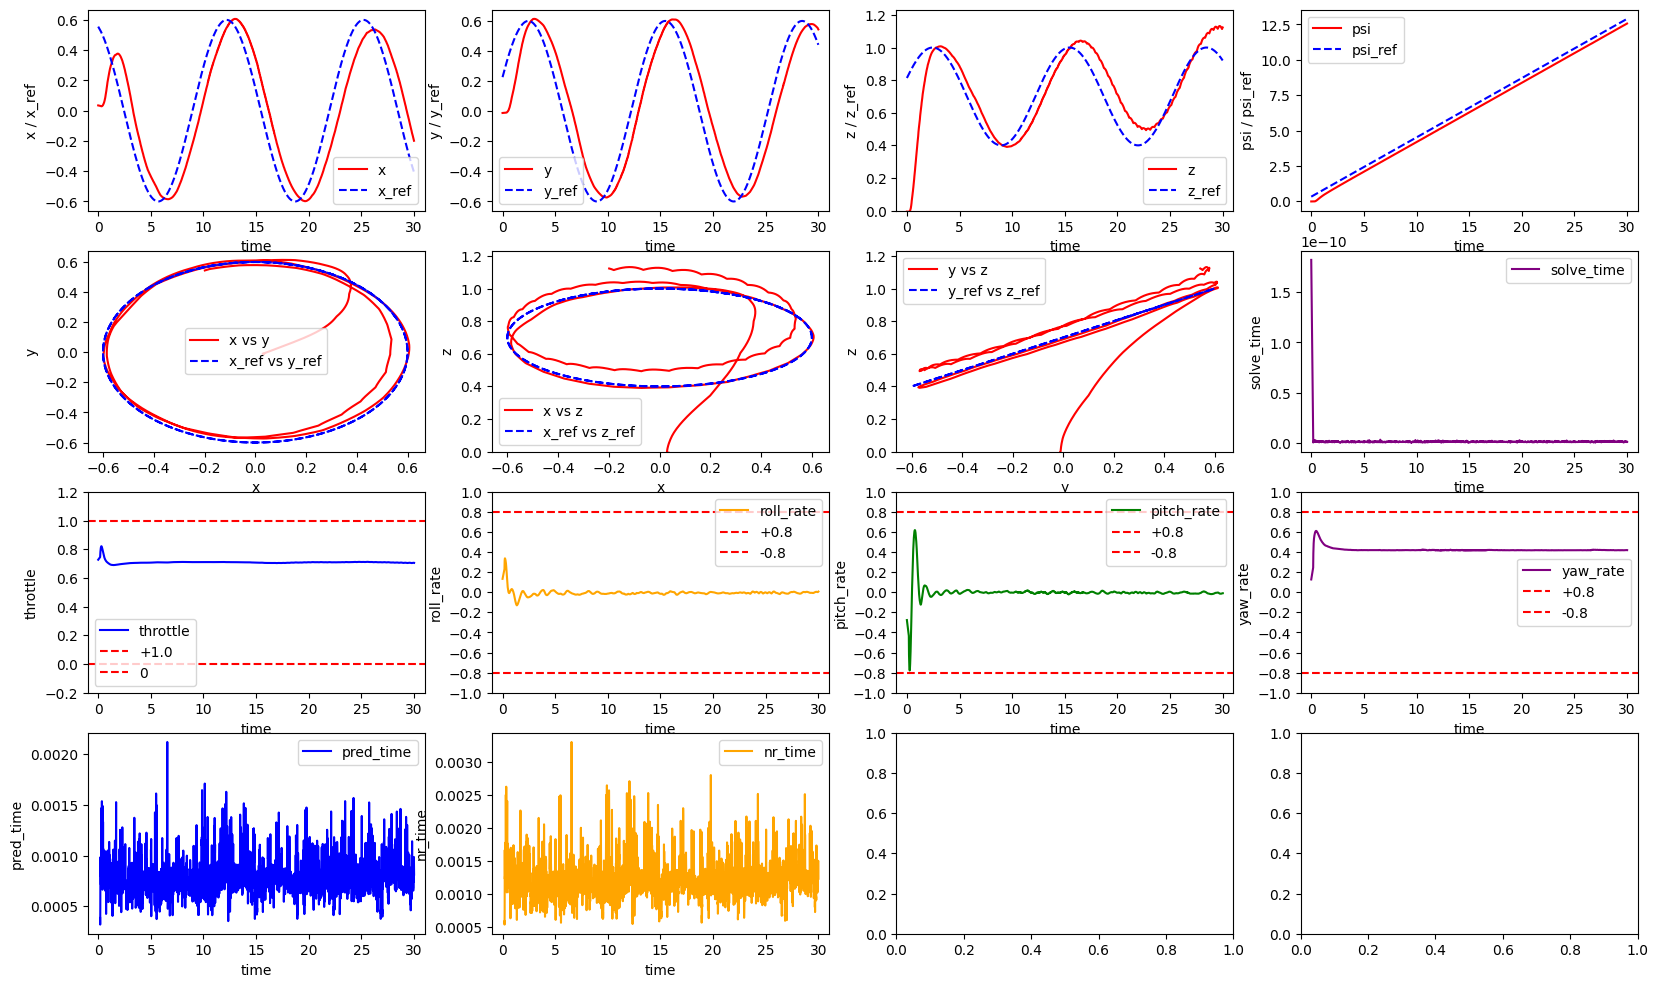

In [4]:
# Reuse the plotting function defined earlier for the uploaded .log data
make_plot(df_log)